# Market Mix Analysis (Introduction to Regression Analysis)

# Preface: 
- ***Im a Data Enthusiast, still learning and developing. Please show your support by upvoting and comment your suggestion and feel free to correct me whereever Im wrong. Wrote this to help out anyone who is starting getting started with marketing mix modeling***


<!-- ## Quick ride through Linear Regression

***For getting a gist of Linear Regression click on the link below.***

Click here: **[Introduction_to_Linear_Regression](http://github.com/veer064/Linear-Regression/blob/master/README.md)** (This will take you to github.com)
--- -->

## Overview
Develop a MMM to to segregate the data

## Business Goals
    - What is/are the best business performance metrics that the company should consider?
    - What are the insights that you can derive from the data set? 
    - Kindly supply visualizations to help drive your arguments. Include any cleansing, transformation, and preprocessing scripts used on the dataset.

#### Outline
* [1: Import Data](#1)
    * [1.1: Dealing with Nan values](#1.1)
* [2: Exploratory Analysis](#2)
    * [2.2: Summary Statistics](#2.2)
    * [2.2: Correlation](#2.2)
    * [2.3: Continious Variables](#2.3)
    * [2.4: Categorical Variables](#2.4)
    * [2.5: Collinearity Test](#2.5)
* [3: Data Preparation](#3)
* [4: Model Building](#4)
* [5: Analysis](#5)

In [196]:
# Basic Libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

# ML libraries
import sklearn
from sklearn import preprocessing

# Statsmodels
import statsmodels.api as sm
import statsmodels.tsa as tsa
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import abline_plot

import warnings
warnings.filterwarnings('ignore')

<a id="1"></a> <br>
## Import Data

In [225]:
data = pd.read_csv("./marketingmixData.csv")

# strip extra spaces in header
data.columns = [i.strip() for i in data.columns]

In [226]:
# Check Data
print("number of rows: {}".format(len(data)))
data.head()

number of rows: 104


,NewVolSales,Base_Price,Radio,InStore,NewspaperInserts,Discount,TV,Stout,Website_Campaign
0,19564,15.029276,245.0,15.452,NaN,0.000,101.780000,2.28342,NaN
1,19387,15.029276,314.0,16.388,NaN,0.000,76.734000,2.22134,NaN
2,23889,14.585093,324.0,62.692,NaN,0.050,131.590200,2.00604,NaN
3,20055,15.332887,298.0,16.573,NaN,0.000,119.627060,2.19897,NaN
4,20064,15.642632,279.0,41.504,NaN,0.045,103.438118,1.81860,NaN


<a id="1.1"></a> <br>
### Dealing with Nan Values

In [227]:
data.isna().sum()

NewVolSales          0
Base_Price           0
Radio                4
InStore              0
NewspaperInserts    98
Discount             0
TV                   0
Stout                0
Website_Campaign    90
dtype: int64

In [228]:
print(data.NewspaperInserts.value_counts())
print(data.Website_Campaign.value_counts())

Insert    6
Name: NewspaperInserts, dtype: int64
Website Campaign     6
Twitter              4
Facebook             4
Name: Website_Campaign, dtype: int64


In [229]:
data["Website_Campaign"] = data["Website_Campaign"].apply(lambda x: 0 if pd.isnull(x) else 1)
data["NewspaperInserts"] = data["NewspaperInserts"].apply(lambda x: 0 if pd.isnull(x) else 1)

- NewsPaperInserts and Website Campaign both have more than 90 empty rows which is more than 80% of the data. With this data I treated them as Categorical data, transforming this feature

In [230]:
data.fillna(0, inplace=True)

Radio has 4 missing values, replacing this with 0 would work

<a id="2"></a> <br>
## 2 : Exploratory Analysis

<a id="2.1"></a> <br>
### 2.1 Summary Statistics

In [231]:
data.describe()

,NewVolSales,Base_Price,Radio,InStore,NewspaperInserts,Discount,TV,Stout,Website_Campaign
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,20171.067308,15.306740,246.817308,32.918567,0.057692,0.022059,141.009774,2.545966,0.134615
std,1578.604670,0.528902,98.663965,13.682570,0.234290,0.027668,42.949231,0.310070,0.342965
min,17431.000000,13.735724,0.000000,10.782000,0.000000,0.000000,37.656174,1.818600,0.000000
25%,19048.750000,15.029276,223.250000,22.183750,0.000000,0.000000,117.108343,2.316450,0.000000
50%,19943.500000,15.332887,276.000000,31.161500,0.000000,0.000000,138.581542,2.502120,0.000000
75%,20942.750000,15.642632,312.250000,41.079000,0.000000,0.049423,175.681780,2.814315,0.000000
max,24944.000000,16.281020,399.000000,68.119000,1.000000,0.090763,240.291967,3.158620,1.000000


<a id="2.2"></a> <br>
### 2.2 Correlation

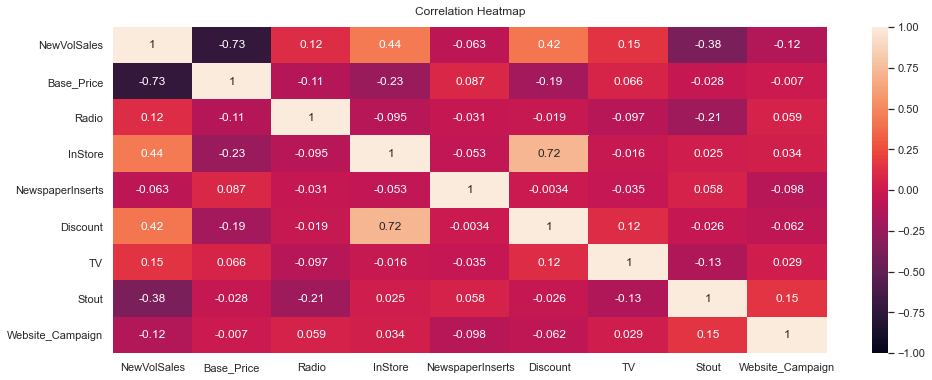

In [232]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

<a id="2.3"></a> <br>
### 2.3 Continious Variables

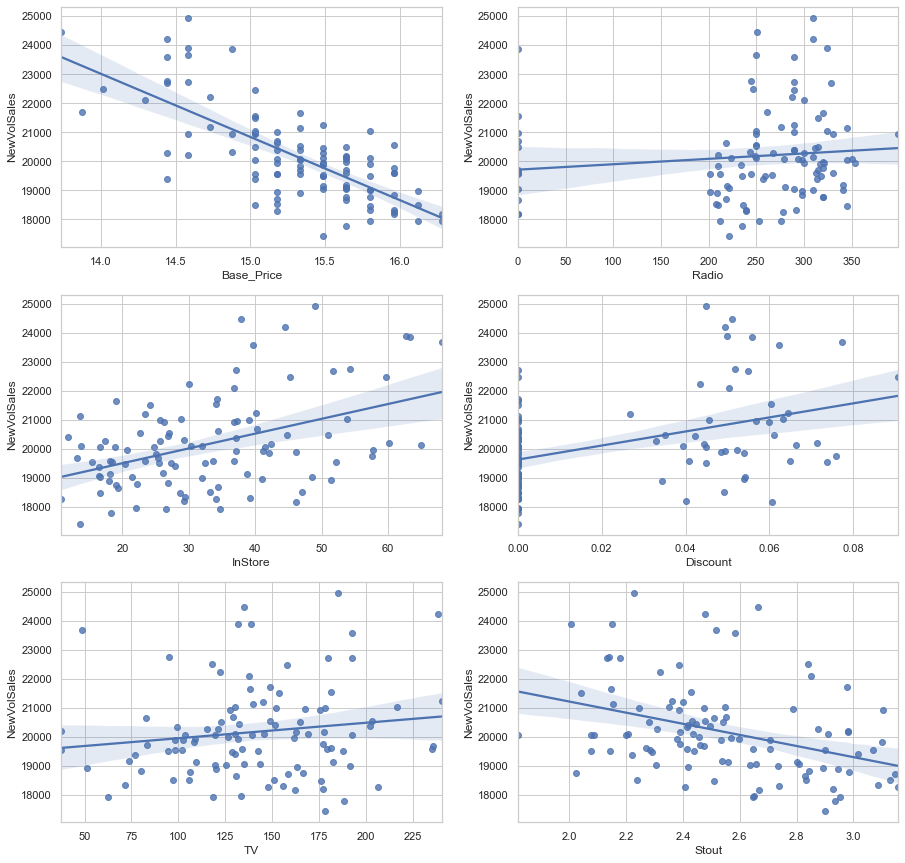

In [233]:
cols = ['Base_Price', 'Radio', 'InStore', 'Discount', 'TV', 'Stout']
n_rows, n_cols = 3, 2
fig_count = 0
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15,15))
for row_idx in range(n_rows):
    for col_idx in range(n_cols):

        sns.regplot(x=cols[fig_count], y='NewVolSales', data=data, ax=axs[row_idx][col_idx])
        fig_count += 1

Seemingly weak linear correlation with Radio and TV.

<a id="2.4"></a> <br>
### 2.4 Categorical Variables

In [ ]:
NewVolSales

In [223]:
data.groupby("NewVolSa")

Index(['NewVolSales', 'Base_Price', 'Radio', 'InStore', 'NewspaperInserts',
       'Discount', 'TV', 'Stout', 'Website_Campaign'],
      dtype='object')

<AxesSubplot:xlabel='variable', ylabel='value'>

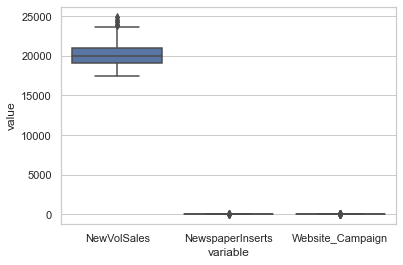

In [253]:
sns.boxplot(x="variable", y="value", data=pd.melt(data[["NewVolSales", "NewspaperInserts", "Website_Campaign"]]))

,variable,value
0,NewVolSales,19564
1,NewVolSales,19387
2,NewVolSales,23889
3,NewVolSales,20055
4,NewVolSales,20064
...,...,...
307,Website_Campaign,0
308,Website_Campaign,0
309,Website_Campaign,0
310,Website_Campaign,0


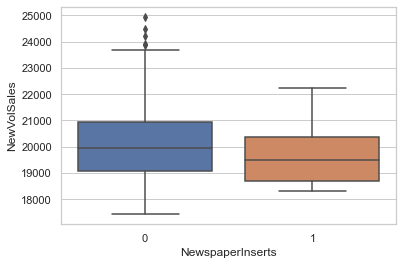

In [240]:
cols = ['NewspaperInserts', 'Website_Campaign']

n_rows, n_cols = 1, 2
fig_count = 0
fig, axs = plt.subplots(nrows=n_rows)
# Draw a nested boxplot to show bills by day and time
for row_idx in range(n_rows):
    sns.boxplot(x=cols[fig_count], y='NewVolSales', data=data)
    fig_count += 1

<a id="2.5"></a> <br>
### 2.5 Collinearity Test

### Continious Variables

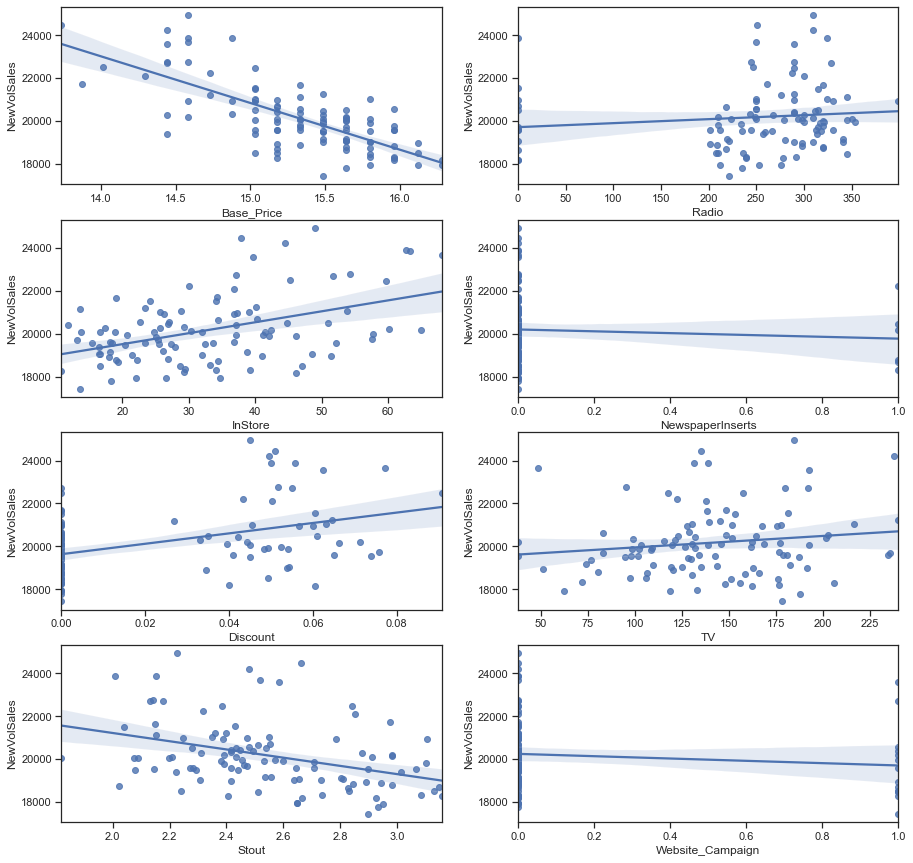

In [193]:
cols = ['Base_Price', 'Radio', 'InStore', 'NewspaperInserts', 'Discount', 'TV', 'Stout', 'Website_Campaign']
n_rows, n_cols = 4, 2
fig_count = 0
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15,15))
for row_idx in range(n_rows):
    for col_idx in range(n_cols):

        sns.regplot(x=cols[fig_count], y='NewVolSales', data=data, ax=axs[row_idx][col_idx])
        fig_count += 1

### Categorical Variables

In [ ]:
website_Campaign, NewspaperInserts

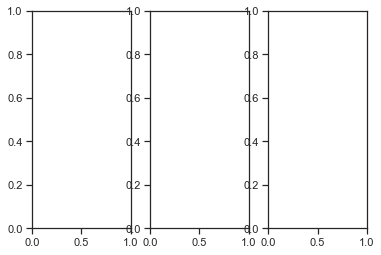

In [173]:
fig, axs = plt.subplots(ncols=3)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(ncols=3)
sns.regplot(x='value', y='wage', data=df_melt, ax=axs[0])
sns.regplot(x='value', y='wage', data=df_melt, ax=axs[1])
sns.boxplot(x='education',y='wage', data=df_melt, ax=axs[2])

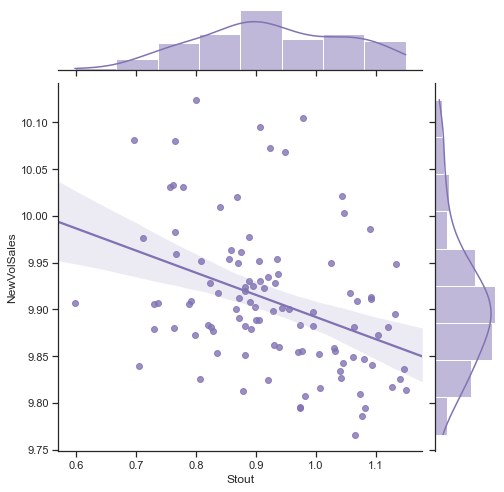

In [171]:
g = sns.jointplot(x="Stout", y="NewVolSales", data=np.log(data),
                  kind="reg", truncate=False,
                  color="m", height=7)

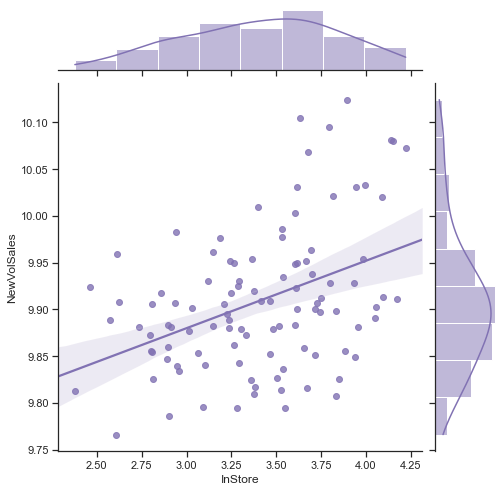

In [172]:
g = sns.jointplot(x="InStore", y="NewVolSales", data=np.log(data),
                  kind="reg", truncate=False,
                  color="m", height=7)

In [81]:
data.head()

,NewVolSales,Base_Price,Radio,InStore,NewspaperInserts,Discount,TV,Stout,Website_Campaign
0,19564,15.029276,245.0,15.452,0,0.000,101.780000,2.28342,0
1,19387,15.029276,314.0,16.388,0,0.000,76.734000,2.22134,0
2,23889,14.585093,324.0,62.692,0,0.050,131.590200,2.00604,0
3,20055,15.332887,298.0,16.573,0,0.000,119.627060,2.19897,0
4,20064,15.642632,279.0,41.504,0,0.045,103.438118,1.81860,0


In [30]:
# Testing for multicollinearity

In [77]:
X = data[['Base_Price', 'Radio', 'InStore', 'NewspaperInserts',
       'Discount', 'TV', 'Stout', 'Website_Campaign']].copy()

X = X.assign(const=1)

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

            feature          VIF
0        Base_Price     1.089986
1             Radio     1.116070
2           InStore     2.245186
3  NewspaperInserts     1.028000
4          Discount     2.213750
5                TV     1.083344
6             Stout     1.113403
7  Website_Campaign     1.070075
8             const  1121.644154


<a id="3"></a> <br>
## 3 : Data Preperations

<a id="4"></a> <br>
## 4 : Modeling

In [96]:

from sklearn.model_selection import train_test_split


X_train, X_valid, y_train, y_valid = train_test_split(data.drop(columns=["NewVolSales"]), data[["NewVolSales"]], test_size = 0.8, random_state = 42)

In [97]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 42)
rf.fit(X_train, y_train)

print('R^2 Training Score: {:.2f} \nOOB Score: {:.2f} \nR^2 Validation Score: {:.2f}'.format(rf.score(X_train, y_train), 
                                                                                             rf.oob_score_,
                                                                                             rf.score(X_valid, y_valid)))

R^2 Training Score: 0.92 
OOB Score: 0.40 
R^2 Validation Score: 0.49


In [100]:
from sklearn.inspection import permutation_importance

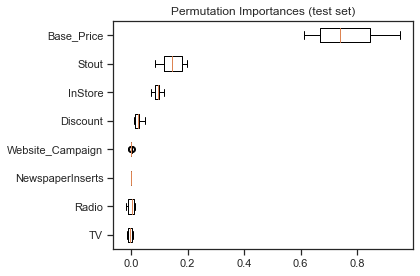

In [103]:
result = permutation_importance(rf, X_valid, y_valid, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T, vert=False, labels=X_valid.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

### 4.1 Modeling Feature Importance

In [105]:

import statsmodels.api as sm

import statsmodels.formula.api as smf



In [156]:
data.columns

Index(['NewVolSales', 'Base_Price', 'Radio', 'InStore', 'NewspaperInserts',
       'Discount', 'TV', 'Stout', 'Website_Campaign'],
      dtype='object')

In [167]:
# Fit regression model (using the natural log of one of the regressors)
results = smf.ols('NewVolSales ~ Base_Price + InStore + Discount + Stout  + (NewspaperInserts + Radio + TV + Website_Campaign)', data=data).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            NewVolSales   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     29.46
Date:                Sun, 11 Jul 2021   Prob (F-statistic):           2.57e-21
Time:                        23:17:34   Log-Likelihood:                -853.32
No. Observations:                 104   AIC:                             1723.
Df Residuals:                      96   BIC:                             1744.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           4.8e+04   2845.778  

In [162]:
# Fit regression model (using the natural log of one of the regressors)
results = smf.ols('NewVolSales ~ Base_Price + InStore + Discount + Stout', data=data).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            NewVolSales   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     89.47
Date:                Sun, 11 Jul 2021   Prob (F-statistic):           5.29e-32
Time:                        23:09:27   Log-Likelihood:                -833.43
No. Observations:                 104   AIC:                             1677.
Df Residuals:                      99   BIC:                             1690.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    5.49e+04   2339.939     23.462      0.0

In [143]:
(0.824-0.783) / 0.783

-0.040999999999999925

In [ ]:
For each predictor of which you want to assess the relative contribution, you need to specify two models. The first model contains all predictors that already figure in your regression model, and the second model is the same with the exception that it omits  the predictor of interest. For instance, 
M1 : y = b0 + b1x1 + b2x2 + b3x3
M2 : y = b0 + b1x1 + b2x2
By comparing these two models, you can assess what is the pourcentage of variance that is explained by the x3 predictor, when you include it in the model. Therefore, you can compute the PRE, Proportional Reductional of Error with the following equation : 
PRE = (Residual Sum of Squares of M2 - Residual Sum of Squares of M1) / Residual Sum of Squares of M2
The PRE represents the effect size of your predictor. In other words, it represents its unique contribution in pourcentages in explaining the variance of your dependent variable. 
Unfortunately, I do not know the way to do it in Matlab, yet I hope it gives you an idea on how you could proceed. 

<a id="5"></a> <br>
## 5 : Final Analysis

Advertising Factos are only accounting for only 4% of the variance behind the SALES